In [1]:
import numpy as np 
import pandas as pd
import glob 
import os
import matplotlib.pyplot as plt

In [26]:
def getJointProperty(df_tracked, joint, val):
    return df_tracked[[joint + " " + val + " x", joint + " " + val + " y", joint + " " + val + " z"]].to_numpy()

In [135]:
def getWindowSummarySelection(values, start, end):
    windowValues = values[(values["time (task)"] >= start) & (values["time (task)"] <= end)]
    summary = {
        "window start time (task)": start,
        "window end time (task)": end,
        "selection count": len(windowValues),
        "success count": np.count_nonzero(windowValues["success"].to_numpy().astype(bool))
    }
    summary["sucess ratio"] = float(summary["success count"]) / summary["selection count"]
    for key in windowValues.keys()[-5:]:
        summary["mean " + key] = np.mean(windowValues[key])
        summary["sum " + key] = np.sum(windowValues[key])
        summary[key + " std"] = np.std(windowValues[key])
    return summary 

def getTaskWindowSummariesSelection(values, timeframe):
    windowSummaries = [] 
    for start in range(0, 120, timeframe):
        end = start + timeframe
        windowSummaries.append(getWindowSummarySelection(values, start, end))
    return pd.DataFrame(windowSummaries)
    
def getParticipantWindowSummariesSelection(values, timeframe): 
    windowSummaries = pd.DataFrame()
    for cid in values["controller id"].unique(): 
        for taskid in values["task id"].unique(): 
            for trialid in values["trial id"].unique():
                taskValues = values[(values["controller id"] == cid) &
                                    (values["task id"] == taskid) & 
                                    (values["trial id"] == trialid)]
                if len(taskValues) <= 0:
                    continue
                taskWindowSummary = getTaskWindowSummariesSelection(taskValues, timeframe)
                taskInfo = taskValues.loc[taskValues.index[0]]
                taskWindowSummary.insert(0, "controller id", cid)
                taskWindowSummary.insert(1, "task id", taskid)
                taskWindowSummary.insert(2, "trial id", trialid)
                taskWindowSummary.insert(3, "input technique", taskInfo["input technique"])
                taskWindowSummary.insert(4, "controller", taskInfo["controller"])
                taskWindowSummary.insert(5, "scale factor", taskInfo["scale factor"])
                taskWindowSummary.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskWindowSummary.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                windowSummaries = pd.concat([windowSummaries, taskWindowSummary], ignore_index=True)
    return windowSummaries

timeframe = 30
windowSummaries = pd.DataFrame()
for pid in range(1,25):
    fs = glob.glob("results/" + str(pid) + "/selections.csv")
    f = fs[0]
    df = pd.read_csv(f)
    summary = getParticipantWindowSummariesSelection(df, timeframe)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/selections-" + str(timeframe) + ".csv")

In [141]:
def getWindowSummaryTrajectory(values, start, end):
    windowValues = values[(values["time (task)"] >= start) & (values["time (task)"] <= end)]
    summary = {
        "window start time (task)": start,
        "window end time (task)": end
    }
    try:
        summary["real-time overlapping ratio"] = float(np.count_nonzero(windowValues["real-time overlapping"])) / len(windowValues["real-time overlapping"])
    except: 
        summary["real-time overlapping ratio"] = 0
    
    try:
        summary["projected overlapping ratio"] = float(np.count_nonzero(windowValues["projected overlapping ratio"])) / len(windowValues["projected overlapping ratio"])
    except: 
        summary["projected overlapping ratio"] = 0
    
    try:
        summary["scaled real-time overlapping ratio"] = float(np.count_nonzero(windowValues["scaled real-time overlapping"])) / len(windowValues["scaled real-time overlapping"])
    except: 
        summary["scaled real-time overlapping ratio"] = 0
        
    try:
        summary["scaled projected overlapping ratio"] = float(np.count_nonzero(windowValues["scaled projected overlapping ratio"])) / len(windowValues["scaled projected overlapping ratio"])
    except: 
        summary["scaled projected overlapping ratio"] = 0
    
    # real-time offset
    for key in windowValues.keys()[31:34]:
        summary["mean " + key] = np.mean(windowValues[key])
        summary["sum " + key] = np.sum(windowValues[key])
        summary[key + " std"] = np.std(windowValues[key])
    # projected offset 
    for key in windowValues.keys()[35:38]:
        summary["mean " + key] = np.mean(windowValues[key])
        summary["sum " + key] = np.sum(windowValues[key])
        summary[key + " std"] = np.std(windowValues[key])
    # scaled real-time offset 
    for key in windowValues.keys()[45:48]:
        summary["mean " + key] = np.mean(windowValues[key])
        summary["sum " + key] = np.sum(windowValues[key])
        summary[key + " std"] = np.std(windowValues[key])
    # scaled projected offset
    for key in windowValues.keys()[49:52]:
        summary["mean " + key] = np.mean(windowValues[key])
        summary["sum " + key] = np.sum(windowValues[key])
        summary[key + " std"] = np.std(windowValues[key])
    return summary 

def getTaskWindowSummariesTrajectory(values, timeframe):
    windowSummaries = [] 
    for start in range(0, 60, timeframe):
        end = start + timeframe
        windowSummaries.append(getWindowSummaryTrajectory(values, start, end))
    return pd.DataFrame(windowSummaries)
    
def getParticipantWindowSummariesTrajectory(values, timeframe): 
    windowSummaries = pd.DataFrame()
    for cid in values["controller id"].unique(): 
        for taskid in values["task id"].unique(): 
            for trialid in values["trial id"].unique():
                for dirnum in values["direction number"].unique(): 
                    taskValues = values[(values["controller id"] == cid) &
                                        (values["task id"] == taskid) & 
                                        (values["trial id"] == trialid) & 
                                        (values["direction number"] == dirnum)]
                    if len(taskValues) <= 0:
                        continue
                    taskWindowSummary = getTaskWindowSummariesTrajectory(taskValues, timeframe)
                    taskInfo = taskValues.loc[taskValues.index[0]]
                    taskWindowSummary.insert(0, "controller id", cid)
                    taskWindowSummary.insert(1, "task id", taskid)
                    taskWindowSummary.insert(2, "trial id", trialid)
                    taskWindowSummary.insert(3, "input technique", taskInfo["input technique"])
                    taskWindowSummary.insert(4, "controller", taskInfo["controller"])
                    taskWindowSummary.insert(5, "scale factor", taskInfo["scale factor"])
                    taskWindowSummary.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                    taskWindowSummary.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                    taskWindowSummary.insert(8, "shape", taskInfo["shape"])
                    taskWindowSummary.insert(9, "direction number", dirnum)
                    taskWindowSummary.insert(10, "direction", taskInfo["direction"])
                    windowSummaries = pd.concat([windowSummaries, taskWindowSummary], ignore_index=True)
    return windowSummaries

timeframe = 10
windowSummaries = pd.DataFrame()
#pid = 1
for pid in range(1,25):
    fs = glob.glob("results/" + str(pid) + "/trajectories.csv")
    f = fs[0]
    df = pd.read_csv(f)
    summary = getParticipantWindowSummariesTrajectory(df, timeframe)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/trajectories-" + str(timeframe) + ".csv")
summary

,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),shape,...,scaled real-time offset y std,mean scaled projected offset magnitude,sum scaled projected offset magnitude,scaled projected offset magnitude std,mean scaled projected offset x,sum scaled projected offset x,scaled projected offset x std,mean scaled projected offset y,sum scaled projected offset y,scaled projected offset y std
0,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,...,0.012362,0.009756,7.619569,0.006954,-0.001185,-0.925486,0.008175,-0.001416,-1.105786,0.008562
1,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,...,0.013591,0.006566,5.791236,0.005296,0.001115,0.983325,0.006699,-0.001394,-1.229932,0.004806
2,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,...,0.010460,0.007798,6.901491,0.005672,0.001383,1.223993,0.005874,-0.001669,-1.476686,0.007334
3,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,...,0.013710,0.007739,6.833800,0.005729,0.001743,1.539085,0.006747,-0.000424,-0.374217,0.006632
4,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,...,0.010383,0.007215,6.384851,0.004743,-0.001076,-0.952454,0.005128,-0.001575,-1.393959,0.006679
5,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,...,0.015359,0.007904,6.813399,0.004977,-0.001468,-1.265480,0.006513,0.000379,0.326709,0.006521
6,24,1,1,1,raycast,controller,2.720240,1.654240e+09,508.8998,circle,...,0.014072,0.008156,6.280076,0.005915,-0.001039,-0.799878,0.008322,0.000886,0.682358,0.005512
7,24,1,1,1,raycast,controller,2.720240,1.654240e+09,508.8998,circle,...,0.013664,0.008890,7.787350,0.008042,0.001351,1.183362,0.005822,-0.002753,-2.412000,0.010020
8,24,1,1,1,raycast,controller,2.720240,1.654240e+09,508.8998,circle,...,0.014821,0.012200,10.796641,0.007240,0.006748,5.972007,0.008398,-0.002467,-2.183204,0.008894
9,24,1,1,1,raycast,controller,2.720240,1.654240e+09,508.8998,circle,...,0.011006,0.007582,6.664645,0.005830,0.001302,1.144720,0.006834,-0.002690,-2.364087,0.005987


In [6]:
def getLocalPose(pose, parentPose): 
    right = np.array([np.multiply(pose["right"], parentPose["right"]).sum(1),
                     np.multiply(pose["right"], parentPose["up"]).sum(1),
                     np.multiply(pose["right"], parentPose["forward"]).sum(1)]).transpose()
    right /= np.linalg.norm(right, axis=1)[:, None]
    up = np.array([np.multiply(pose["up"], parentPose["right"]).sum(1),
                     np.multiply(pose["up"], parentPose["up"]).sum(1),
                     np.multiply(pose["up"], parentPose["forward"]).sum(1)]).transpose()
    up /= np.linalg.norm(up, axis=1)[:, None]
    forward = np.array([np.multiply(pose["forward"], parentPose["right"]).sum(1),
                     np.multiply(pose["forward"], parentPose["up"]).sum(1),
                     np.multiply(pose["forward"], parentPose["forward"]).sum(1)]).transpose()
    forward /= np.linalg.norm(forward, axis=1)[:, None]
    return {
        "right": right,
        "up": up,
        "forward": forward
    }

def getAngularMotion(forwards):
    dots = np.multiply(forwards[:-1], forwards[1:]).sum(1)
    norms = np.linalg.norm(forwards, axis=1)
    dots = np.divide(dots, norms[:-1])
    dots = np.divide(dots, norms[1:])
    return np.rad2deg(np.arccos(np.clip(dots, -1, 1)))

def getDifferences(frames):
    return (np.abs(np.array(frames)[1:] - np.array(frames)[:-1]))

In [4]:
def getJointAngularMotion(df):
    joints = ["WRIST", "KNUCKLE", "ELBOW", "SHOULDER"]
    jointPoses = {}
    for joint in joints:
        jointPoses[joint.lower() + " position"] = df[[joint + " position x", joint + " position y", joint + " position z"]].to_numpy().astype(float)
        jointPoses[joint.lower() + " forward"] = df[[joint + " forward x", joint + " forward y", joint + " forward z"]].to_numpy().astype(float)
        jointPoses[joint.lower() + " up"] = df[[joint + " up x", joint + " up y", joint + " up z"]].to_numpy().astype(float)

    upperArm = jointPoses["elbow position"] - jointPoses["shoulder position"]
    upperArm /= np.linalg.norm(upperArm, axis=1)[:,None]
    upperArmUp = jointPoses["shoulder up"]
    upperArmUp /= np.linalg.norm(upperArmUp, axis=1)[:,None]
    upperArmRight = np.cross(upperArm, upperArmUp)
    upperArmRight /= np.linalg.norm(upperArmRight, axis=1)[:,None]
    upperArmUp = np.cross(upperArmRight, upperArm)
    upperArmUp /= np.linalg.norm(upperArmUp, axis=1)[:,None]
    upperArmPose = {
        "forward": upperArm,
        "up": upperArmUp,
        "right": upperArmRight
    }

    lowerArm = jointPoses["wrist position"] - jointPoses["elbow position"]
    lowerArm /= np.linalg.norm(lowerArm, axis=1)[:,None]
    lowerArmUp = jointPoses["elbow up"]
    lowerArmUp /= np.linalg.norm(lowerArmUp, axis=1)[:,None]
    lowerArmRight = np.cross(lowerArm, lowerArmUp)
    lowerArmRight /= np.linalg.norm(lowerArmRight, axis=1)[:,None]
    lowerArmUp = np.cross(lowerArmRight, lowerArm)
    lowerArmUp /= np.linalg.norm(lowerArmUp, axis=1)[:,None]
    lowerArmPose = {
        "forward": lowerArm,
        "up": lowerArmUp,
        "right": lowerArmRight
    }
    lowerArmPoseLocal = getLocalPose(lowerArmPose, upperArmPose)

    hand = jointPoses["knuckle position"] - jointPoses["wrist position"]
    hand /= np.linalg.norm(hand, axis=1)[:,None]
    handUp = jointPoses["wrist up"]
    handUp /= np.linalg.norm(handUp, axis=1)[:,None]
    handRight = np.cross(hand, handUp)
    handRight /= np.linalg.norm(handRight, axis=1)[:,None]
    handUp = np.cross(handRight, hand)
    handUp /= np.linalg.norm(handUp, axis=1)[:,None]
    handPose = {
        "forward": hand,
        "up": handUp,
        "right": handRight
    }
    handPoseLocal = getLocalPose(handPose, lowerArmPose)

    upperArmMotion = getAngularMotion(upperArmPose["forward"])
    #lowerArmMotion = getAngularMotion(lowerArmPose["forward"])
    lowerArmMotion = getAngularMotion(lowerArmPoseLocal["forward"])
    #handMotion = getAngularMotion(handPose["forward"])
    handMotion = getAngularMotion(handPoseLocal["forward"])

    return upperArmMotion, lowerArmMotion, handMotion

def getJointMotionSummaryWindow(df, start, end):
    windowValues = df[(df["time (task)"] >= start) & (df["time (task)"] <= end)]
    upperArmMotion, lowerArmMotion, handMotion = getJointAngularMotion(windowValues)
    deltaTime = end - start
    motion = {
        "upper arm accumulated": np.sum(getDifferences(upperArmMotion)),
        "lower arm accumulated": np.sum(getDifferences(lowerArmMotion)),
        "hand accumulated": np.sum(getDifferences(handMotion))
    }
    return motion

def getParticipantMotionsSelectionByTarget(df, df_tracked):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                targets = task["target number"].unique()
                taskMotion = pd.DataFrame()
                for target in targets:
                    trial = task[task["target number"] == target]
                    start = trial['trial start time (task)'].to_numpy()[0]
                    end = trial['time (task)'].to_numpy()[0]
                    trialMotion = pd.DataFrame([getJointMotionSummaryWindow(tracked, start, end)])
                    trialMotion.insert(0, "target number", target)
                    trialMotion.insert(1, "start time (task)", start)
                    trialMotion.insert(2, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, trialMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion

'''
for pid in range(1,25):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    summary = getParticipantMotionsSelectionByTarget(df, df_tracked)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/motion-selection.csv") 
'''

'\nfor pid in range(1,25):\n    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")\n    df = pd.read_csv("results/" + str(pid) + "/selections.csv")\n    summary = getParticipantMotionsSelectionByTarget(df, df_tracked)\n    summary.insert(0, "participant id", pid)\n    summary.to_csv("summaries/" + str(pid) + "/motion-selection.csv") \n'

In [76]:
def getPinchStats(vals):
    return np.min(vals), np.max(vals), np.mean(vals), np.std(vals)

def getPinchStatsAll(pid):
    selection = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")
    trajectoryTracing = pd.read_csv("results/" + str(pid) + "/trackedTrajectoryTracing.csv")
    allVals = np.concatenate([selection["pinch strength"].to_numpy(), trajectoryTracing["pinch strength"].to_numpy()])
    return getPinchStats(allVals)

# Pinch strength by target 
def getPinchStengthSummaryWindow(df, start, end, allmin=0, allmax=0, allmean=0, allstd=0):
    windowValues = df[(df["time (task)"] >= start) & (df["time (task)"] <= end)]
    pinchStrength = windowValues["pinch strength"].to_numpy()
    windowMin, windowMax, windowMean, windowStd =  getPinchStats(pinchStrength)
    pinchStrengthStats = {}
    pinchStrengthStats["pinch strength mean"] = np.mean(pinchStrength)
    pinchStrengthStats["pinch strength max"] = np.max(pinchStrength)
    pinchStrengthStats["pinch strength min"] = np.min(pinchStrength)
    pinchStrengthStats["pinch strength std"] = np.std(pinchStrength)
    if allmax - allmin > 0: 
        normalizedByAll = np.copy(pinchStrength)
        normalizedByAll -= allmin
        normalizedByAll /= (allmax - allmin)
        pinchStrengthStats[ "pinch strength mean (normalized by all)"] = np.mean(normalizedByAll)
        pinchStrengthStats[ "pinch strength max (normalized by all)"] = np.max(normalizedByAll)
        pinchStrengthStats[ "pinch strength min (normalized by all)"] = np.min(normalizedByAll)
        pinchStrengthStats[ "pinch strength std (normalized by all)"] = np.std(normalizedByAll)
    else: 
        pinchStrengthStats[ "pinch strength mean (normalized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength max (normalized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength min (normalized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength std (normalized by all)"] = np.nan
    
    if allstd > 0: 
        normalizedByAll = np.copy(pinchStrength)
        normalizedByAll -= allmean
        normalizedByAll /= allstd
        pinchStrengthStats[ "pinch strength mean (standardized by all)"] = np.mean(normalizedByAll)
        pinchStrengthStats[ "pinch strength max (standardized by all)"] = np.max(normalizedByAll)
        pinchStrengthStats[ "pinch strength min (standardized by all)"] = np.min(normalizedByAll)
        pinchStrengthStats[ "pinch strength std (standardized by all)"] = np.std(normalizedByAll)
    else: 
        pinchStrengthStats[ "pinch strength mean (standardized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength max (standardized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength min (standardized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength std (standardized by all)"] = np.nan
    
    if windowMax - windowMin > 0: 
        normalizedByWindow = np.copy(pinchStrength)
        normalizedByWindow -= windowMin
        normalizedByWindow /= (windowMax - windowMin)
        pinchStrengthStats[ "pinch strength mean (normalized by window)"] = np.mean(normalizedByWindow)
        pinchStrengthStats[ "pinch strength max (normalized by window)"] = np.max(normalizedByWindow)
        pinchStrengthStats[ "pinch strength min (normalized by window)"] = np.min(normalizedByWindow)
        pinchStrengthStats[ "pinch strength std (normalized by window)"] = np.std(normalizedByWindow)
    else: 
        pinchStrengthStats[ "pinch strength mean (normalized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength max (normalized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength min (normalized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength std (normalized by window)"] = np.nan
        
    if windowStd > 0: 
        normalizedByWindow = np.copy(pinchStrength)
        normalizedByWindow -= windowMean
        normalizedByWindow /= windowStd
        pinchStrengthStats[ "pinch strength mean (standardized by window)"] = np.mean(normalizedByWindow)
        pinchStrengthStats[ "pinch strength max (standardized by window)"] = np.max(normalizedByWindow)
        pinchStrengthStats[ "pinch strength min (standardized by window)"] = np.min(normalizedByWindow)
        pinchStrengthStats[ "pinch strength std (standardized by window)"] = np.std(normalizedByWindow)
    else: 
        pinchStrengthStats[ "pinch strength mean (standardized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength max (standardized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength min (standardized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength std (standardized by window)"] = np.nan
    
    
    excludeZeros = pinchStrength[pinchStrength > 0]
    if len(excludeZeros) > 0:   
        pinchStrengthStats["pinch strength mean (excluding zeros)"] = np.mean(excludeZeros)
        pinchStrengthStats["pinch strength max (excluding zeros)"] = np.max(excludeZeros)
        pinchStrengthStats["pinch strength min (excluding zeros)"] = np.min(excludeZeros)
        pinchStrengthStats["pinch strength std (excluding zeros)"] = np.std(excludeZeros)
        
        if allmax - allmin > 0: 
            normalizedByAll = np.copy(excludeZeros)
            normalizedByAll -= allmin
            normalizedByAll /= (allmax - allmin)
            pinchStrengthStats[ "pinch strength mean (excluding zeros, normalized by all)"] = np.mean(normalizedByAll)
            pinchStrengthStats[ "pinch strength max (excluding zeros, normalized by all)"] = np.max(normalizedByAll)
            pinchStrengthStats[ "pinch strength min (excluding zeros, normalized by all)"] = np.min(normalizedByAll)
            pinchStrengthStats[ "pinch strength std (excluding zeros, normalized by all)"] = np.std(normalizedByAll)
        else: 
            pinchStrengthStats[ "pinch strength mean (excluding zeros, normalized by all)"] = np.nan
            pinchStrengthStats[ "pinch strength max (excluding zeros, normalized by all)"] = np.nan
            pinchStrengthStats[ "pinch strength min (excluding zeros, normalized by all)"] = np.nan
            pinchStrengthStats[ "pinch strength std (excluding zeros, normalized by all)"] = np.nan
        
        if allstd > 0: 
            normalizedByAll = np.copy(excludeZeros)
            normalizedByAll -= allmean
            normalizedByAll /= allstd
            pinchStrengthStats[ "pinch strength mean (excluding zeros, standardized by all)"] = np.mean(normalizedByAll)
            pinchStrengthStats[ "pinch strength max (excluding zeros, standardized by all)"] = np.max(normalizedByAll)
            pinchStrengthStats[ "pinch strength min (excluding zeros, standardized by all)"] = np.min(normalizedByAll)
            pinchStrengthStats[ "pinch strength std (excluding zeros, standardized by all)"] = np.std(normalizedByAll)
        else: 
            
            pinchStrengthStats[ "pinch strength mean (excluding zeros, standardized by all)"] = np.nan
            pinchStrengthStats[ "pinch strength max (excluding zeros, standardized by all)"] = np.nan
            pinchStrengthStats[ "pinch strength min (excluding zeros, standardized by all)"] = np.nan
            pinchStrengthStats[ "pinch strength std (excluding zeros, standardized by all)"] = np.nan    
        
        windowMin, windowMax, windowMean, windowStd =  getPinchStats(excludeZeros)
        if windowMax - windowMin > 0: 
            normalizedByWindow = np.copy(excludeZeros)
            normalizedByWindow -= windowMin
            normalizedByWindow /= (windowMax - windowMin)
            pinchStrengthStats[ "pinch strength mean (excluding zeros, normalized by window)"] = np.mean(normalizedByWindow)
            pinchStrengthStats[ "pinch strength max (excluding zeros, normalized by window)"] = np.max(normalizedByWindow)
            pinchStrengthStats[ "pinch strength min (excluding zeros, normalized by window)"] = np.min(normalizedByWindow)
            pinchStrengthStats[ "pinch strength std (excluding zeros, normalized by window)"] = np.std(normalizedByWindow)
        else: 
            pinchStrengthStats[ "pinch strength mean (excluding zeros, normalized by window)"] = np.nan
            pinchStrengthStats[ "pinch strength max (excluding zeros, normalized by window)"] = np.nan
            pinchStrengthStats[ "pinch strength min (excluding zeros, normalized by window)"] = np.nan
            pinchStrengthStats[ "pinch strength std (excluding zeros, normalized by window)"] = np.nan
            
        if windowStd > 0: 
            normalizedByWindow = np.copy(excludeZeros)
            normalizedByWindow -= windowMean
            normalizedByWindow /= windowStd
            pinchStrengthStats[ "pinch strength mean (excluding zeros, standardized by window)"] = np.mean(normalizedByWindow)
            pinchStrengthStats[ "pinch strength max (excluding zeros, standardized by window)"] = np.max(normalizedByWindow)
            pinchStrengthStats[ "pinch strength min (excluding zeros, standardized by window)"] = np.min(normalizedByWindow)
            pinchStrengthStats[ "pinch strength std (excluding zeros, standardized by window)"] = np.std(normalizedByWindow)
        else: 
            pinchStrengthStats[ "pinch strength mean (excluding zeros, standardized by window)"] = np.nan
            pinchStrengthStats[ "pinch strength max (excluding zeros, standardized by window)"] = np.nan
            pinchStrengthStats[ "pinch strength min (excluding zeros, standardized by window)"] = np.nan
            pinchStrengthStats[ "pinch strength std (excluding zeros, standardized by window)"] = np.nan
    else:
        pinchStrengthStats[ "pinch strength mean"] = np.nan
        pinchStrengthStats[ "pinch strength max"] = np.nan
        pinchStrengthStats[ "pinch strength min"] = np.nan
        pinchStrengthStats[ "pinch strength std"] = np.nan
        pinchStrengthStats[ "pinch strength mean (excluding zeros)"] = np.nan
        pinchStrengthStats[ "pinch strength max (excluding zeros)"] = np.nan
        pinchStrengthStats[ "pinch strength min (excluding zeros)"] = np.nan
        pinchStrengthStats[ "pinch strength std (excluding zeros)"] = np.nan
        pinchStrengthStats[ "pinch strength mean (excluding zeros, normalized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength max (excluding zeros, normalized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength min (excluding zeros, normalized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength std (excluding zeros, normalized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength mean (excluding zeros, normalized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength max (excluding zeros, normalized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength min (excluding zeros, normalized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength std (excluding zeros, normalized by all)"] =  np.nan
        pinchStrengthStats[ "pinch strength mean (excluding zeros, standardized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength max (excluding zeros, standardized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength min (excluding zeros, standardized by all)"] = np.nan
        pinchStrengthStats[ "pinch strength std (excluding zeros, standardized by all)"] = np.nan  
        pinchStrengthStats[ "pinch strength mean (excluding zeros, standardized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength max (excluding zeros, standardized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength min (excluding zeros, standardized by window)"] = np.nan
        pinchStrengthStats[ "pinch strength std (excluding zeros, standardized by window)"] = np.nan
    
    return pinchStrengthStats 

def getParticipantPinchStrengthSelectionByTarget(df, df_tracked, allmin=0, allmax=0, allmean=0, allstd=0):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                targets = task["target number"].unique()
                taskMotion = pd.DataFrame()
                for target in targets:
                    trial = task[task["target number"] == target]
                    start = trial['trial start time (task)'].to_numpy()[0]
                    end = trial['time (task)'].to_numpy()[0]
                    trialMotion = pd.DataFrame([getPinchStengthSummaryWindow(tracked, start, end, allmin, allmax, allmean, allstd)])
                    trialMotion.insert(0, "target number", target)
                    trialMotion.insert(1, "start time (task)", start)
                    trialMotion.insert(2, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, trialMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion


for pid in range(1,25):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    allmin, allmax, allmean, allstd = getPinchStatsAll(pid)
    print(pid, allmin, allmax, allmean, allstd)
    summary = getParticipantPinchStrengthSelectionByTarget(df, df_tracked, allmin, allmax, allmean, allstd)
    summary.insert(0, "participant id", pid)
    #summary.to_csv("summaries/" + str(pid) + "/pinch-selection.csv") 
summary

1 0.0 0.0 0.0 0.0
2 0.0 1157.0 249.48047691133604 317.30663595859113
3 0.0 0.0 0.0 0.0
4 0.0 821.0 172.50021690898498 272.22253673218296
5 0.0 94.0 0.004497202959135172 0.5313230497124105
6 0.0 1163.0 224.0558766859345 372.4901232966128
7 0.0 0.0 0.0 0.0
8 0.0 2182.0 721.5203981478273 668.3618775660169
9 0.0 0.0 0.0 0.0
10 0.0 2201.0 642.8545901582575 518.6782103875317
11 0.0 0.0 0.0 0.0
12 0.0 2907.0 376.75075068165347 586.431836085441
13 0.0 0.0 0.0 0.0
14 0.0 2544.0 992.261742258295 837.9640469036137
15 0.0 0.0 0.0 0.0
16 0.0 2505.0 776.3552519324733 866.6569900210271
17 0.0 0.0 0.0 0.0
18 0.0 1986.0 312.48617678078375 455.3723178008031
19 0.0 0.0 0.0 0.0
20 0.0 2101.0 420.9706720977597 607.1976458774168
21 0.0 0.0 0.0 0.0
22 0.0 2170.0 202.0037643754245 300.96860636180793
23 0.0 0.0 0.0 0.0
24 0.0 1936.0 234.4884149613832 403.9725683480756


,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),target number,...,"pinch strength min (excluding zeros, normalized by all)","pinch strength std (excluding zeros, normalized by all)","pinch strength mean (excluding zeros, standardized by all)","pinch strength max (excluding zeros, standardized by all)","pinch strength min (excluding zeros, standardized by all)","pinch strength std (excluding zeros, standardized by all)","pinch strength mean (excluding zeros, standardized by window)","pinch strength max (excluding zeros, standardized by window)","pinch strength min (excluding zeros, standardized by window)","pinch strength std (excluding zeros, standardized by window)"
0,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,5,...,0.006198,0.000000,-0.550751,-0.550751,-0.550751,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,152,...,0.107438,0.220614,1.978898,2.929683,-0.065570,1.057270,-2.624164e-16,0.899283,-1.933724,1.0
604,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,153,...,0.091942,0.276849,1.874137,3.147520,-0.139832,1.326775,-6.530724e-17,0.959758,-1.517943,1.0
605,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,154,...,0.023244,0.138427,1.079557,1.709303,-0.469063,0.663396,-1.332268e-16,0.949276,-2.334383,1.0
606,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,155,...,0.026343,0.139323,0.572734,1.548401,-0.454210,0.667691,7.401487e-17,1.461257,-1.538054,1.0


In [39]:
np.max(summary["pinch strength mean (excluding zeros, normalized by all)"])

1.4835892772101402e-06

In [77]:
def getParticipantPinchStrengthSelectionByWindow(df, df_tracked, timeframe, allmin=0, allmax=0, allmean=0, allstd=0):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                taskMotion = pd.DataFrame()
                for start in range(0, 120, timeframe):
                    end = start + timeframe
                    windowMotion = pd.DataFrame([getPinchStengthSummaryWindow(tracked, start, end, allmin, allmax, allmean, allstd)])
                    windowMotion.insert(0, "start time (task)", start)
                    windowMotion.insert(1, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, windowMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion

timeframe = 120
for pid in range(1,25):
    print(pid, flush=True)
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    allmin, allmax, allmean, allstd = getPinchStatsAll(pid)
    summary = getParticipantPinchStrengthSelectionByWindow(df, df_tracked, timeframe, allmin, allmax, allmean, allstd)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/pinch-selection-" + str(timeframe) + ".csv") 
summary

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),start time (task),...,"pinch strength min (excluding zeros, standardized by all)","pinch strength std (excluding zeros, standardized by all)","pinch strength mean (excluding zeros, normalized by window)","pinch strength max (excluding zeros, normalized by window)","pinch strength min (excluding zeros, normalized by window)","pinch strength std (excluding zeros, normalized by window)","pinch strength mean (excluding zeros, standardized by window)","pinch strength max (excluding zeros, standardized by window)","pinch strength min (excluding zeros, standardized by window)","pinch strength std (excluding zeros, standardized by window)"
0,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,0,...,-0.550751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,1,2,2,raycast,controller,2.745291,1.654241e+09,1710.573,0,...,-0.548276,0.637288,0.540528,1.0,0.0,0.381969,-6.427607e-17,1.202905,-1.415110,1.0
2,24,2,2,1,raycast,hand,2.734322,1.654242e+09,3039.156,0,...,-0.575505,0.748917,0.188301,1.0,0.0,0.156433,-4.685633e-17,5.188793,-1.203713,1.0
3,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,0,...,-0.577981,0.730420,0.257288,1.0,0.0,0.184649,-1.024821e-16,4.022282,-1.393388,1.0


In [65]:
getPinchStatsAll(2)

(0.0, 1157.0, 249.48047691133604, 317.30663595859113)

In [52]:
# CE by target 
def getCESummaryWindow(df, start, end):
    windowValues = df[(df["time (task)"] >= start) & (df["time (task)"] <= end)]
    CE = windowValues["consume endurance"].to_numpy()
    CEStats = {
        "CE mean": np.mean(CE),
        "CE max": np.max(CE),
        "CE min": np.min(CE),
        "CE std": np.std(CE),
    }
    return CEStats

def getParticipantCESelectionByTarget(df, df_tracked):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                targets = task["target number"].unique()
                taskMotion = pd.DataFrame()
                for target in targets:
                    trial = task[task["target number"] == target]
                    start = trial['trial start time (task)'].to_numpy()[0]
                    end = trial['time (task)'].to_numpy()[0]
                    trialMotion = pd.DataFrame([getCESummaryWindow(tracked, start, end)])
                    trialMotion.insert(0, "target number", target)
                    trialMotion.insert(1, "start time (task)", start)
                    trialMotion.insert(2, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, trialMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion


for pid in range(1,25):
    df_tracked = pd.read_csv("summaries/" + str(pid) + "/ce-selection-all.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    summary = getParticipantCESelectionByTarget(df, df_tracked)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/ce-selection.csv") 
summary

,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),target number,start time (task),end time (task),CE mean,CE max,CE min,CE std
0,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,1,0.000000,1.082001,5.657196,5.725040,5.535861,0.066203
1,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,2,1.136176,2.057258,5.645754,5.727641,5.534826,0.062830
2,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,3,2.115065,2.871606,5.610601,5.680203,5.543196,0.050728
3,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,4,2.926563,3.662792,5.677401,5.762112,5.549242,0.078749
4,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,5,3.719951,4.653768,5.663306,5.759121,5.610015,0.045624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,152,116.066900,116.611400,4.161346,4.226554,4.095510,0.044775
604,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,153,116.667000,117.323100,3.908642,4.189842,3.727664,0.170957
605,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,154,117.380300,118.025100,4.070264,4.335633,3.744819,0.204680
606,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,155,118.082100,118.827000,4.035769,4.345860,3.789300,0.206109


In [53]:
def getParticipantCESelectionByWindow(df, df_tracked, timeframe):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                taskMotion = pd.DataFrame()
                for start in range(0, 120, timeframe):
                    end = start + timeframe
                    windowMotion = pd.DataFrame([getCESummaryWindow(tracked, start, end)])
                    windowMotion.insert(0, "start time (task)", start)
                    windowMotion.insert(1, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, windowMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion

timeframe = 120 
for pid in range(1,25):
    print(pid, flush=True)
    df_tracked = pd.read_csv("summaries/" + str(pid) + "/ce-selection-all.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    summary = getParticipantCESelectionByWindow(df, df_tracked, timeframe)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/ce-selection-" + str(timeframe) + ".csv") 
summary

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),start time (task),end time (task),CE mean,CE max,CE min,CE std
0,24,1,2,1,raycast,controller,2.748084,1.654240e+09,1262.803,0,120,5.546229,5.830663,5.090510,0.132337
1,24,1,2,2,raycast,controller,2.745291,1.654241e+09,1710.573,0,120,5.972561,6.378852,5.394091,0.191616
2,24,2,2,1,raycast,hand,2.734322,1.654242e+09,3039.156,0,120,4.361181,5.450339,3.707982,0.325563
3,24,2,2,2,raycast,hand,2.726678,1.654243e+09,3455.015,0,120,4.277812,5.222285,3.627811,0.310115


In [16]:
# CE by target 
def getRULASummaryWindow(df, start, end):
    windowValues = df[(df["time (task)"] >= start) & (df["time (task)"] <= end)]
    RULA = windowValues["rula"].to_numpy()
    RULAStats = {
        "rula mean": np.mean(RULA),
        "rula max": np.max(RULA),
        "rula min": np.min(RULA),
        "rula std": np.std(RULA),
    }
    return RULAStats

def getParticipantRULASelectionByTarget(df, df_tracked):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                targets = task["target number"].unique()
                taskMotion = pd.DataFrame()
                for target in targets:
                    trial = task[task["target number"] == target]
                    start = trial['trial start time (task)'].to_numpy()[0]
                    end = trial['time (task)'].to_numpy()[0]
                    trialMotion = pd.DataFrame([getRULASummaryWindow(tracked, start, end)])
                    trialMotion.insert(0, "target number", target)
                    trialMotion.insert(1, "start time (task)", start)
                    trialMotion.insert(2, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, trialMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion

def getParticipantRULASelectionByWindow(df, df_tracked, timeframe):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                taskMotion = pd.DataFrame()
                for start in range(0, 120, timeframe):
                    end = start + timeframe
                    windowMotion = pd.DataFrame([getRULASummaryWindow(tracked, start, end)])
                    windowMotion.insert(0, "start time (task)", start)
                    windowMotion.insert(1, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, windowMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion

timeframe = 120
for pid in range(1,25):
    df_tracked = pd.read_csv("summaries-old-3/" + str(pid) + "/rula-selection-all.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    summary = getParticipantRULASelectionByWindow(df, df_tracked, timeframe)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/rula-selection-" + str(timeframe) + ".csv") 

In [9]:
def getParticipantMotionsSelectionWindow(df, df_tracked, timeframe):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                targets = task["target number"].unique()
                taskMotion = pd.DataFrame()
                for start in range(0, 120, timeframe):
                    end = start + timeframe
                    windowMotion = pd.DataFrame([getJointMotionSummaryWindow(tracked, start, end)])
                    windowMotion.insert(0, "start time (task)", start)
                    windowMotion.insert(1, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, windowMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion

timeframe = 120
for pid in range(1,25):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    summary = getParticipantMotionsSelectionWindow(df, df_tracked, timeframe)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/motion-selection-" + str(timeframe) + ".csv") 
summary

NameError: name 'getJointMotionSummaryWindow' is not defined

In [48]:
for i in range(1,25):
    os.mkdir("summaries/" + str(i))

In [291]:
for i in range(1,25):
    os.remove("summaries/" + str(i) + "/ce-selection-cursor-offset-0.3.csv")

In [150]:
def getParticipantMotionsTrajectory(df, df_tracked):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                for dirnum in df["direction number"].unique():
                    tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                        (df_tracked["task id"] == taskid) & 
                                        (df_tracked["trial id"] == trialid) & 
                                        (df_tracked["direction number"] == dirnum)]
                    trial = df[(df["controller id"] == cid) &
                                (df["task id"] == taskid) & 
                                (df["trial id"] == trialid) & 
                               (df["direction number"] == dirnum)]
                    trialMotion = pd.DataFrame([getJointMotionSummaryWindow(tracked, 0, 60)])
                    trialInfo = trial.loc[trial.index[0]]
                    trialMotion.insert(0, "controller id", cid)
                    trialMotion.insert(1, "task id", taskid)
                    trialMotion.insert(2, "trial id", trialid)
                    trialMotion.insert(3, "input technique", trialInfo["input technique"])
                    trialMotion.insert(4, "controller", trialInfo["controller"])
                    trialMotion.insert(5, "scale factor", trialInfo["scale factor"])
                    trialMotion.insert(6, "task start time (unix)", trialInfo["task start time (unix)"])
                    trialMotion.insert(7, "task start time (experiment)", trialInfo["task start time (experiment)"])
                    trialMotion.insert(8, "shape", trialInfo["shape"])
                    trialMotion.insert(9, "direction number", dirnum)
                    trialMotion.insert(10, "direction", trialInfo["direction"])
                    motion = pd.concat([motion, trialMotion], ignore_index=True)
                
    return motion


for pid in range(1,25):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedTrajectoryTracing.csv")
    df = pd.read_csv("results/" + str(pid) + "/trajectories.csv")
    summary = getParticipantMotionsTrajectory(df, df_tracked)
    summary.insert(0, "participant id", pid)
    #summary.to_csv("summaries/" + str(pid) + "/motion-trajectory.csv") 
summary

,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),shape,direction number,direction,upper arm accumulated,lower arm accumulated,hand accumulated
0,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,1,anticlockwise,66.544245,308.858192,212.243001
1,24,1,1,1,raycast,controller,2.720240,1.654240e+09,508.8998,circle,2,clockwise,75.914625,329.047993,203.816364
2,24,1,1,2,raycast,controller,2.747772,1.654240e+09,840.1554,polyline,1,anticlockwise,86.053875,285.180830,388.407021
3,24,1,1,2,raycast,controller,2.747772,1.654240e+09,901.9133,polyline,2,clockwise,89.221697,323.777317,325.438577
4,24,2,1,1,raycast,hand,2.757160,1.654241e+09,2142.3760,polyline,1,clockwise,139.685489,543.024344,417.024064
5,24,2,1,1,raycast,hand,2.757160,1.654241e+09,2205.8890,polyline,2,anticlockwise,140.136747,641.716860,439.076778
6,24,2,1,2,raycast,hand,2.727005,1.654242e+09,2595.4940,circle,1,clockwise,114.037924,428.846786,413.870445
7,24,2,1,2,raycast,hand,2.727005,1.654242e+09,2656.9750,circle,2,anticlockwise,123.025861,526.628625,417.063087


In [78]:
# Pinch strength by trajectory 
def getParticipantPinchStrengthTrajectory(df, df_tracked, allmin=0, allmax=0, allmean=0, allstd=0):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                for dirnum in df["direction number"].unique():
                    tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                        (df_tracked["task id"] == taskid) & 
                                        (df_tracked["trial id"] == trialid) & 
                                        (df_tracked["direction number"] == dirnum)]
                    trial = df[(df["controller id"] == cid) &
                                (df["task id"] == taskid) & 
                                (df["trial id"] == trialid) & 
                               (df["direction number"] == dirnum)]
                    trialMotion = pd.DataFrame([getPinchStengthSummaryWindow(tracked, 0, 60, allmin, allmax, allmean, allstd)])
                    trialInfo = trial.loc[trial.index[0]]
                    trialMotion.insert(0, "controller id", cid)
                    trialMotion.insert(1, "task id", taskid)
                    trialMotion.insert(2, "trial id", trialid)
                    trialMotion.insert(3, "input technique", trialInfo["input technique"])
                    trialMotion.insert(4, "controller", trialInfo["controller"])
                    trialMotion.insert(5, "scale factor", trialInfo["scale factor"])
                    trialMotion.insert(6, "task start time (unix)", trialInfo["task start time (unix)"])
                    trialMotion.insert(7, "task start time (experiment)", trialInfo["task start time (experiment)"])
                    trialMotion.insert(8, "shape", trialInfo["shape"])
                    trialMotion.insert(9, "direction number", dirnum)
                    trialMotion.insert(10, "direction", trialInfo["direction"])
                    motion = pd.concat([motion, trialMotion], ignore_index=True)
                
    return motion

for pid in range(1,25):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedTrajectoryTracing.csv")
    df = pd.read_csv("results/" + str(pid) + "/trajectories.csv")
    allmin, allmax, allmean, allstd = getPinchStatsAll(pid)
    print(pid, allmin, allmax, allmean, allstd)
    summary = getParticipantPinchStrengthTrajectory(df, df_tracked, allmin, allmax, allmean, allstd)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/pinch-trajectory.csv") 
summary

1 0.0 0.0 0.0 0.0
2 0.0 1157.0 249.48047691133604 317.30663595859113
3 0.0 0.0 0.0 0.0
4 0.0 821.0 172.50021690898498 272.22253673218296
5 0.0 94.0 0.004497202959135172 0.5313230497124105
6 0.0 1163.0 224.0558766859345 372.4901232966128
7 0.0 0.0 0.0 0.0
8 0.0 2182.0 721.5203981478273 668.3618775660169
9 0.0 0.0 0.0 0.0
10 0.0 2201.0 642.8545901582575 518.6782103875317
11 0.0 0.0 0.0 0.0
12 0.0 2907.0 376.75075068165347 586.431836085441
13 0.0 0.0 0.0 0.0
14 0.0 2544.0 992.261742258295 837.9640469036137
15 0.0 0.0 0.0 0.0
16 0.0 2505.0 776.3552519324733 866.6569900210271
17 0.0 0.0 0.0 0.0
18 0.0 1986.0 312.48617678078375 455.3723178008031
19 0.0 0.0 0.0 0.0
20 0.0 2101.0 420.9706720977597 607.1976458774168
21 0.0 0.0 0.0 0.0
22 0.0 2170.0 202.0037643754245 300.96860636180793
23 0.0 0.0 0.0 0.0
24 0.0 1936.0 234.4884149613832 403.9725683480756


,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),shape,...,"pinch strength min (excluding zeros, normalized by all)","pinch strength std (excluding zeros, normalized by all)","pinch strength mean (excluding zeros, standardized by all)","pinch strength max (excluding zeros, standardized by all)","pinch strength min (excluding zeros, standardized by all)","pinch strength std (excluding zeros, standardized by all)","pinch strength mean (excluding zeros, standardized by window)","pinch strength max (excluding zeros, standardized by window)","pinch strength min (excluding zeros, standardized by window)","pinch strength std (excluding zeros, standardized by window)"
0,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,1,1,1,raycast,controller,2.720240,1.654240e+09,508.8998,circle,...,0.001550,0.000000,-0.573030,-0.573030,-0.573030,0.000000,NaN,NaN,NaN,NaN
2,24,1,1,2,raycast,controller,2.747772,1.654240e+09,840.1554,polyline,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,1,1,2,raycast,controller,2.747772,1.654240e+09,901.9133,polyline,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,2,1,1,raycast,hand,2.757160,1.654241e+09,2142.3760,polyline,...,0.033574,0.093657,2.148434,3.783701,-0.419554,0.448840,6.327440e-17,3.643319,-5.721390,1.0
5,24,2,1,1,raycast,hand,2.757160,1.654241e+09,2205.8890,polyline,...,0.000517,0.076231,0.635220,2.115271,-0.577981,0.365331,1.335397e-16,4.051264,-3.320831,1.0
6,24,2,1,2,raycast,hand,2.727005,1.654242e+09,2595.4940,circle,...,0.090393,0.103988,1.857763,3.580717,-0.147259,0.498351,2.212237e-16,3.457311,-4.023312,1.0
7,24,2,1,2,raycast,hand,2.727005,1.654242e+09,2656.9750,circle,...,0.011880,0.090697,1.641115,2.627682,-0.523522,0.434657,2.652104e-16,2.269763,-4.980107,1.0


In [61]:
# Consumed Endurance by trajectory 
def getParticipantCETrajectory(df, df_tracked):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                for dirnum in df["direction number"].unique():
                    tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                        (df_tracked["task id"] == taskid) & 
                                        (df_tracked["trial id"] == trialid) & 
                                        (df_tracked["direction number"] == dirnum)]
                    trial = df[(df["controller id"] == cid) &
                                (df["task id"] == taskid) & 
                                (df["trial id"] == trialid) & 
                               (df["direction number"] == dirnum)]
                    trialMotion = pd.DataFrame([getCESummaryWindow(tracked, 0, 60)])
                    trialInfo = trial.loc[trial.index[0]]
                    trialMotion.insert(0, "controller id", cid)
                    trialMotion.insert(1, "task id", taskid)
                    trialMotion.insert(2, "trial id", trialid)
                    trialMotion.insert(3, "input technique", trialInfo["input technique"])
                    trialMotion.insert(4, "controller", trialInfo["controller"])
                    trialMotion.insert(5, "scale factor", trialInfo["scale factor"])
                    trialMotion.insert(6, "task start time (unix)", trialInfo["task start time (unix)"])
                    trialMotion.insert(7, "task start time (experiment)", trialInfo["task start time (experiment)"])
                    trialMotion.insert(8, "shape", trialInfo["shape"])
                    trialMotion.insert(9, "direction number", dirnum)
                    trialMotion.insert(10, "direction", trialInfo["direction"])
                    motion = pd.concat([motion, trialMotion], ignore_index=True)
                
    return motion

for pid in range(1,25):
    df_tracked = pd.read_csv("summaries/" + str(pid) + "/ce-trajectory-all.csv")
    df = pd.read_csv("results/" + str(pid) + "/trajectories.csv")
    summary = getParticipantCETrajectory(df, df_tracked)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/ce-trajectory.csv") 
summary

,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),shape,direction number,direction,CE mean,CE max,CE min,CE std
0,24,1,1,1,raycast,controller,2.720240,1.654239e+09,447.8240,circle,1,anticlockwise,5.964788,6.422191,5.469954,0.246295
1,24,1,1,1,raycast,controller,2.720240,1.654240e+09,508.8998,circle,2,clockwise,6.408338,6.715660,6.056836,0.156687
2,24,1,1,2,raycast,controller,2.747772,1.654240e+09,840.1554,polyline,1,anticlockwise,5.908225,6.433321,5.387038,0.244744
3,24,1,1,2,raycast,controller,2.747772,1.654240e+09,901.9133,polyline,2,clockwise,6.352941,6.701855,6.043357,0.162359
4,24,2,1,1,raycast,hand,2.757160,1.654241e+09,2142.3760,polyline,1,clockwise,4.985377,6.242870,3.616004,0.694423
5,24,2,1,1,raycast,hand,2.757160,1.654241e+09,2205.8890,polyline,2,anticlockwise,5.921954,6.753989,4.779442,0.628033
6,24,2,1,2,raycast,hand,2.727005,1.654242e+09,2595.4940,circle,1,clockwise,5.807894,6.671115,4.788669,0.557216
7,24,2,1,2,raycast,hand,2.727005,1.654242e+09,2656.9750,circle,2,anticlockwise,6.041893,6.739943,5.007579,0.559842


In [112]:
# Consumed Endurance by trajectory 
def getParticipantRULATrajectory(df, df_tracked):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                for dirnum in df["direction number"].unique():
                    tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                        (df_tracked["task id"] == taskid) & 
                                        (df_tracked["trial id"] == trialid) & 
                                        (df_tracked["direction number"] == dirnum)]
                    trial = df[(df["controller id"] == cid) &
                                (df["task id"] == taskid) & 
                                (df["trial id"] == trialid) & 
                               (df["direction number"] == dirnum)]
                    trialMotion = pd.DataFrame([getRULASummaryWindow(tracked, 0, 60)])
                    trialInfo = trial.loc[trial.index[0]]
                    trialMotion.insert(0, "controller id", cid)
                    trialMotion.insert(1, "task id", taskid)
                    trialMotion.insert(2, "trial id", trialid)
                    trialMotion.insert(3, "input technique", trialInfo["input technique"])
                    trialMotion.insert(4, "controller", trialInfo["controller"])
                    trialMotion.insert(5, "scale factor", trialInfo["scale factor"])
                    trialMotion.insert(6, "task start time (unix)", trialInfo["task start time (unix)"])
                    trialMotion.insert(7, "task start time (experiment)", trialInfo["task start time (experiment)"])
                    trialMotion.insert(8, "shape", trialInfo["shape"])
                    trialMotion.insert(9, "direction number", dirnum)
                    trialMotion.insert(10, "direction", trialInfo["direction"])
                    motion = pd.concat([motion, trialMotion], ignore_index=True)
                
    return motion

In [7]:
def getParticipantMotionsTrajectoryWindow(df, df_tracked, timeframe):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                for dirnum in df["direction number"].unique():
                    tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                        (df_tracked["task id"] == taskid) & 
                                        (df_tracked["trial id"] == trialid) & 
                                        (df_tracked["direction number"] == dirnum)]
                    trial = df[(df["controller id"] == cid) &
                                (df["task id"] == taskid) & 
                                (df["trial id"] == trialid) & 
                               (df["direction number"] == dirnum)]
                    taskMotion = pd.DataFrame()
                    for start in range(0, 60, timeframe):
                        end = start + timeframe
                        windowMotion = pd.DataFrame([getJointMotionSummaryWindow(tracked, start, end)])
                        windowMotion.insert(0, "start time (task)", start)
                        windowMotion.insert(1, "end time (task)", end)
                        taskMotion = pd.concat([taskMotion, windowMotion], ignore_index=True)
                    trialInfo = trial.loc[trial.index[0]]
                    taskMotion.insert(0, "controller id", cid)
                    taskMotion.insert(1, "task id", taskid)
                    taskMotion.insert(2, "trial id", trialid)
                    taskMotion.insert(3, "input technique", trialInfo["input technique"])
                    taskMotion.insert(4, "controller", trialInfo["controller"])
                    taskMotion.insert(5, "scale factor", trialInfo["scale factor"])
                    taskMotion.insert(6, "task start time (unix)", trialInfo["task start time (unix)"])
                    taskMotion.insert(7, "task start time (experiment)", trialInfo["task start time (experiment)"])
                    taskMotion.insert(8, "shape", trialInfo["shape"])
                    taskMotion.insert(9, "direction number", dirnum)
                    taskMotion.insert(10, "direction", trialInfo["direction"])
                    motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion

timeframe = 60
for pid in range(1,2):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedTrajectoryTracing.csv")
    df = pd.read_csv("results/" + str(pid) + "/trajectories.csv")
    summary = getParticipantMotionsTrajectoryWindow(df, df_tracked, timeframe)
    summary.insert(0, "participant id", pid)
    #summary.to_csv("summaries/" + str(pid) + "/motion-trajectory-" + str(timeframe) + ".csv") 
summary

,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),shape,direction number,direction,start time (task),end time (task),upper arm accumulated,lower arm accumulated,hand accumulated
0,1,1,2,1,touch,hand,1.0,1.652943e+09,940.622,circle,1,clockwise,0,60,217.016425,605.281418,365.027963
1,1,1,2,1,touch,hand,1.0,1.652943e+09,1001.565,circle,2,anticlockwise,0,60,219.218694,622.565675,355.947197
2,1,1,2,2,touch,hand,1.0,1.652943e+09,1300.026,polyline,1,clockwise,0,60,246.521404,644.290244,407.784607
3,1,1,2,2,touch,hand,1.0,1.652943e+09,1363.487,polyline,2,anticlockwise,0,60,228.851274,629.529674,408.099717
4,1,2,2,1,touch,controller,1.0,1.652945e+09,2608.640,polyline,1,anticlockwise,0,60,248.282784,998.900540,369.956238
5,1,2,2,1,touch,controller,1.0,1.652945e+09,2669.470,polyline,2,clockwise,0,60,250.124139,1080.445451,420.317212
6,1,2,2,2,touch,controller,1.0,1.652945e+09,2962.292,circle,1,clockwise,0,60,232.295552,829.521286,400.965151
7,1,2,2,2,touch,controller,1.0,1.652945e+09,3023.074,circle,2,anticlockwise,0,60,257.032973,861.496584,365.899895


In [60]:
# Consumed endurance 
def computeCE(shoulder, elbowJoint, hand): 
    end_effector = hand - shoulder
    elbow = elbowJoint - shoulder
    
     # ehv stands for elbow hand vector
    ehv = end_effector - elbow
    ehv_magnitude = np.linalg.norm(ehv)
    ehv_unit = ehv / ehv_magnitude
    elbow_magnitude = np.linalg.norm(elbow)
    elbow_unit = elbow / elbow_magnitude
    # Due to the fact that we lock the hand coordinate (always at 0 degrees), the CoM of the elbow - hand vector
    # will always be at 17.25cm from the elbow for 50th percent male
    # 11.7 + 0.25 * 22.2 = 17.25
    # 17.25 / 46 = 0.375
    # check appendix B of Consumed Endurance paper for more info
    forearm_hand_length = 26.9 + 19.1
    arm_proper_length = 33
    
    d = elbow + ehv_unit * forearm_hand_length * 0.01 * 0.375
    a = elbow_unit * arm_proper_length * 0.01 * 0.4
    ad = d - a
    com = a + 0.43 * ad

    # mass should be adjusted if arm dimensions change
    # 3.7kg for 50th percentile male, currently a simple heuristic based on arm size.
    adjusted_mass = (forearm_hand_length + arm_proper_length) / 79 * 3.7
    torque_shoulder = np.cross(com, adjusted_mass * np.array([0, 9.8, 0]))
    torque_shoulder_mag = np.linalg.norm(torque_shoulder)

    strength = torque_shoulder_mag / 101.6 * 100
    return strength

def computeCETracked(df_tracked):
    joint = "KNUCKLE"
    hand = df_tracked[[joint + " position x", joint + " position y", joint + " position z"]].to_numpy()
    joint = "ELBOW"
    elbow = df_tracked[[joint + " position x", joint + " position y", joint + " position z"]].to_numpy()
    joint = "SHOULDER"
    shoulder = df_tracked[[joint + " position x", joint + " position y", joint + " position z"]].to_numpy()
    ce = [] 
    for h, e, s in zip(hand, elbow, shoulder):
        ce.append(computeCE(h, e, s))
    df_ce = df_tracked[df_tracked.keys()[:14]]
    df_ce.insert(14, "consume endurance", ce)
    return df_ce


for pid in range(1, 25):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedTrajectoryTracing.csv")
    df_ce = computeCETracked(df_tracked)
    df_ce.to_csv("summaries/" + str(pid) + "/ce-trajectory-all.csv") 

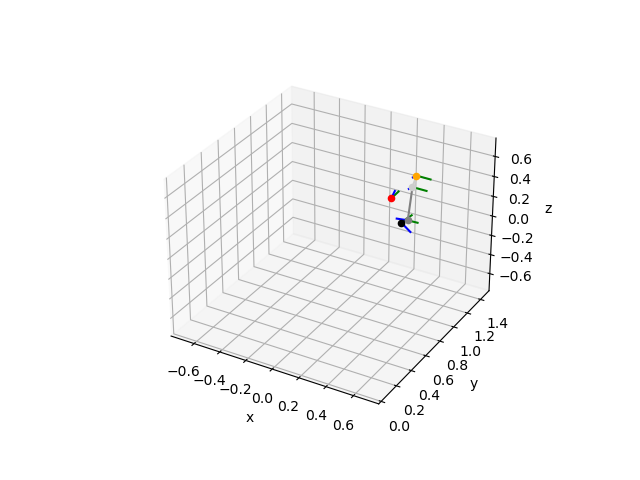

In [45]:
def getTrackedJoints(df_tracked): 
    knuckle= {
        "position": getJointProperty(df_tracked, "WRIST", "position"),
        "forward": getJointProperty(df_tracked, "WRIST", "forward"),
        "up": getJointProperty(df_tracked, "WRIST", "up")
    }
    wrist = { # I messed up the labeling here
        "position": getJointProperty(df_tracked, "KNUCKLE", "position"),
        "forward": getJointProperty(df_tracked, "KNUCKLE", "forward"),
        "up": getJointProperty(df_tracked, "KNUCKLE", "up")
    }
    hand = {
        "position": getJointProperty(df_tracked, "HAND", "position"),
        "forward": getJointProperty(df_tracked, "HAND", "forward"),
        "up": getJointProperty(df_tracked, "HAND", "up")
    }
    elbow = {
        "position": getJointProperty(df_tracked, "ELBOW", "position"),
        "forward": getJointProperty(df_tracked, "ELBOW", "forward"),
        "up": getJointProperty(df_tracked, "ELBOW", "up")
    }
    shoulder = {
        "position": getJointProperty(df_tracked, "SHOULDER", "position"),
        "forward": getJointProperty(df_tracked, "SHOULDER", "forward"),
        "up": getJointProperty(df_tracked, "SHOULDER", "up")
    }
    head = {
        "position": getJointProperty(df_tracked, "HEAD", "position"),
        "forward": getJointProperty(df_tracked, "HEAD", "forward"),
        "up": getJointProperty(df_tracked, "HEAD", "up")
    }
    
    return head, shoulder, elbow, hand, wrist, knuckle 


def plotVector(ax, start, end, color):
    ax.plot([start[0], end[0]],
           [start[1], end[1]],
           [start[2], end[2]], c=color)

def plotOrientedPoint(ax, position, up, forward, length, color): #right, up, forward, length, color):
    ax.scatter(position[0], position[1], position[2], c=color)
    #plotVector(ax, position, position + length * right, "red")
    plotVector(ax, position, position + length * up, "green")
    plotVector(ax, position, position + length * forward, "blue")

def angle(v1, v2): 
    dot = np.dot(v1, v2)
    dot /= np.linalg.norm(v1)
    dot /= np.linalg.norm(v2)
    return np.rad2deg(np.arccos(np.clip(dot, -1, 1)))
   
def plotTrackedJoints(df_tracked, frame): 
    
    head, shoulder, elbow, hand, wrist, knuckle = getTrackedJoints(df_tracked)
    
    %matplotlib widget
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    plotOrientedPoint(ax, head["position"][frame], head["up"][frame], head["forward"][frame], 0.1, "red")
    plotOrientedPoint(ax, shoulder["position"][frame], shoulder["up"][frame], shoulder["forward"][frame], 0.1, "black")
    plotOrientedPoint(ax, elbow["position"][frame], elbow["up"][frame], elbow["forward"][frame], 0.1, "grey")
    plotOrientedPoint(ax, wrist["position"][frame], wrist["up"][frame], wrist["forward"][frame], 0.1, "#cccccc")
    plotOrientedPoint(ax, knuckle["position"][frame], knuckle["up"][frame], knuckle["forward"][frame], 0.1, "orange")
    
    plotVector(ax, shoulder["position"][frame], elbow["position"][frame], "black")
    plotVector(ax, elbow["position"][frame], wrist["position"][frame], "grey")
    plotVector(ax, wrist["position"][frame], knuckle["position"][frame], "#cccccc")

    
    ax.set_xlim(-0.75, 0.75)
    ax.set_ylim(0.0,1.5)
    ax.set_zlim(-0.75, 0.75)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    plt.show()

def computeRULA(headPos, shoulderPos, elbowPos, wristPos, knucklePos):
    up = np.array([0,1,0])
    forward = np.array([0,0,1])
    right = np.array([1,0,0])

    upperArm = elbowPos - shoulderPos
    lowerArm = wristPos - elbowPos 
    hand = knucklePos - wristPos

    rula_score = 0

    shoulder_elv = angle(upperArm, -up)

    # upper arm flexion / extension
    if shoulder_elv < 20:
        rula_score += 1
    elif shoulder_elv < 45:
        rula_score += 2
    elif shoulder_elv < 90:
        rula_score += 3
    else:
        rula_score += 4
    print("upper arm score:", rula_score)

    bodyRight = shoulderPos - headPos
    bodyRight[1] = 0 
    shoulderWidth = np.linalg.norm(bodyRight)
    bodyRight /= shoulderWidth
    bodyForward = np.cross(bodyRight, up)
    #upperArmXZ = upperArm 
    #upperArmXZ[1] = 0 
    #upperArmXZ /= np.linalg.norm(upperArmXZ)
    #elv_angle = angle(bodyForward, upperArmXZ)

    # if upper arm abducted 
    # abducted if elv_angle > 45 or < -45 and shoulder_elv > 30 
    #if (elv_angle > 45 or elv_angle < -45) and shoulder_elv > 30:
    #    print("shoulder abducted")
    #    rula_score += 1

    elbow_flexion = angle(upperArm, lowerArm)
    print("elbow_flexion: ", elbow_flexion)

    # lower arm flexion
    if 60 < elbow_flexion < 100:
        rula_score += 1
        print("lower arm score: 1")
    else:
        rula_score += 2
        print("lower arm score: 2")

    wrist_angle = angle(hand, lowerArm)

    # arm working across midline or out to side of body 
    end_effector = knucklePos - headPos
    end_effectorXZ = end_effector
    end_effectorXZ[1] = 0 
    toEndEffector = np.dot(bodyRight, end_effectorXZ)
    if toEndEffector > shoulderWidth or toEndEffector < 0: 
        print("working across midline")
        rula_score += 1

    # wrist bending 
    if wrist_angle < 15: 
        print("wrist bend score: 1")
        rula_score += 1
    else:
        print("wrist bend score: 2")
        rula_score += 2

    return rula_score

def computeRULATracked(df_tracked):
    head, shoulder, elbow, hand, wrist, knuckle = getTrackedJoints(df_tracked)
    rula = [] 
    for headPos, shoulderPos, elbowPos, wristPos, knucklePos in zip(head["position"], shoulder["position"], elbow["position"], wrist["position"], knuckle["position"]):
        rula.append(computeRULA(headPos, shoulderPos, elbowPos, wristPos, knucklePos))
    df_rula = df_tracked[df_tracked.keys()[:11]]
    df_rula.insert(11, "rula", rula)
    return df_rula

''''
df_rula = None
for pid in range(1, 25):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedTrajectoryTracing.csv")
    df_rula = computeRULATracked(df_tracked)
    df_rula.to_csv("summaries/" + str(pid) + "/rula-trajectory-all.csv") 
'''

pid = 21
df_tracked = pd.read_csv("results/" + str(pid) + "/trackedTrajectoryTracing.csv")
plotTrackedJoints(df_tracked, 100)

# Head: red
# Shoulder: black 
# Elbow: grey
# Wrist: light grey 
# Knuckle: orange

In [30]:
headPos = np.array([0,1.7,0])
shoulderPos = np.array([0.2, 1.5, 0])
elbowPos = np.array([0.2, 1.2, 0.0])
wristPos = np.array([-0.2, 1.2, 0.3])
knucklePos = np.array([-0.2, 0.8, 0.03])
computeRULA(headPos, shoulderPos, elbowPos, wristPos, knucklePos)

upper arm score: 1
elbow_flexion:  90.0
lower arm score: 1
working across midline
wrist bend score: 2


5

In [115]:
for pid in range(1,25):
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")
    df_rula = computeRULATracked(df_tracked)
    df_rula.to_csv("summaries/" + str(pid) + "/rula-selection-all.csv") 
    
    df_tracked = pd.read_csv("summaries/" + str(pid) + "/rula-selection-all.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    summary = getParticipantRULASelectionByTarget(df, df_tracked)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/rula-selection.csv") 
    
    df_tracked = pd.read_csv("summaries/" + str(pid) + "/rula-trajectory-all.csv")
    df = pd.read_csv("results/" + str(pid) + "/trajectories.csv")
    summary = getParticipantRULATrajectory(df, df_tracked)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/rula-trajectory.csv") 


In [ ]:
# CE by target 
def getCESummaryWindow(df, start, end):
    windowValues = df[(df["time (task)"] >= start) & (df["time (task)"] <= end)]
    CE = windowValues["consume endurance"].to_numpy()
    CEStats = {
        "CE mean": np.mean(CE),
        "CE max": np.max(CE),
        "CE min": np.min(CE),
        "CE std": np.std(CE),
    }
    return CEStats

def getParticipantCESelectionByTarget(df, df_tracked):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                targets = task["target number"].unique()
                taskMotion = pd.DataFrame()
                for target in targets:
                    trial = task[task["target number"] == target]
                    start = trial['trial start time (task)'].to_numpy()[0]
                    end = trial['time (task)'].to_numpy()[0]
                    trialMotion = pd.DataFrame([getCESummaryWindow(tracked, start, end)])
                    trialMotion.insert(0, "target number", target)
                    trialMotion.insert(1, "start time (task)", start)
                    trialMotion.insert(2, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, trialMotion], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
                
    return motion

'''
for pid in range(1,25):
    df_tracked = pd.read_csv("summaries/" + str(pid) + "/ce-selection-all.csv")
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    summary = getParticipantCESelectionByTarget(df, df_tracked)
    summary.insert(0, "participant id", pid)
    summary.to_csv("summaries/" + str(pid) + "/ce-selection.csv") 
summary
'''

In [292]:
def getMotionWindow(df, start, end):
    windowValues = df[(df["time (task)"] >= start) & (df["time (task)"] <= end)]

def getCursorOffsetSelection(df, df_tracked, tBefore):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                targets = task["target number"].unique()
                taskMotion = pd.DataFrame()
                for target in targets:
                    trial = task[task["target number"] == target]
                    scaleFactor = trial["scale factor"].to_numpy()[0]
                    targetPosition = np.array([trial["target position x"], trial["target position y"], trial["target position z"]])[:,0]
                    start = trial['trial start time (task)'].to_numpy()[0]
                    end = trial['time (task)'].to_numpy()[0]
                    entry = {
                        "offset magnitude": None,
                        "offset x": None,
                        "offset y": None,
                        "scaled offset magnitude": None,
                        "scaled offset x": None,
                        "scaled offset y": None,
                    }
                    if tBefore < end - start:
                        targetMotion = tracked[(tracked["time (task)"] >= start) & (tracked["time (task)"] <= end)]
                        times = targetMotion["time (task)"].to_numpy()
                        closest = np.argmin(np.abs(times - (end-tBefore)))
                        tBeforeMotion = targetMotion.iloc[closest]
                        if tBeforeMotion["cursor active"]:
                            cursorPosition = np.array([tBeforeMotion["cursor position x"], tBeforeMotion["cursor position y"], tBeforeMotion["cursor position z"]])
                            offset = cursorPosition[:2] - targetPosition[:2]
                            entry["offset magnitude"] = np.linalg.norm(offset)
                            entry["offset x"] = offset[0]
                            entry["offset y"] = offset[1]
                            entry["scaled offset magnitude"] = scaleFactor * entry["offset magnitude"]
                            entry["scaled offset x"] = scaleFactor * entry["offset x"]
                            entry["scaled offset y"] = scaleFactor * entry["offset y"]
                    entry = pd.DataFrame([entry])
                    entry.insert(0, "target number", target)
                    entry.insert(1, "start time (task)", start)
                    entry.insert(2, "end time (task)", end)
                    taskMotion = pd.concat([taskMotion, entry], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
    return motion

tOffset = 0.3
for pid in range(1,25):
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")
    summary = getCursorOffsetSelection(df, df_tracked, tOffset)
    summary.insert(0, "participant id", pid)
    tOffsetStr = "".join(str(tOffset).split("."))
    summary.to_csv("summaries/" + str(pid) + "/selection-cursor-offset-" + tOffsetStr + ".csv") 


In [196]:
df = pd.read_csv("results/" + str(2) + "/selections.csv")
for k,key in enumerate(df.keys()):
    print(key)

participant id
controller id
task id
trial id
input technique
controller
scale factor
task start time (unix)
task start time (experiment)
target number
target id
target position x
target position y
target position z
scaled target position x
scaled target position y
scaled target position z
time (unix)
time (experiment)
time (task)
trial start time (unix)
trial start time (experiment)
trial start time (task)
selection time (unix)
selection time (experiment)
selection time (task)
success
user position x
user position y
user position z
scaled user position x
scaled user position y
scaled user position z
offset magnitude
offset x
offset y
scaled offset magnitude
scaled offset x
scaled offset y


In [240]:
def converttid(tid):
    taskid = np.ceil(float(tid) / 2)
    trialid = ((tid - 1) % 2) + 1
    return taskid, trialid

def convertController(inputType):
    info = inputType.split("_")
    controller = info[0].lower()
    technique = info[1].lower()
    return technique, controller

def parsePose(pose):
    if type(pose) is str:
        pose = pose.split(",")
    return {
        "position": np.array(pose[0:3]).astype(float),
        "forward": np.array(pose[3:6]).astype(float),
        "up": np.array(pose[6:9]).astype(float),
        "rotation": np.array(pose[9:13]).astype(float),
        "relative position": np.array(pose[13:16]).astype(float),
        "relative forward": np.array(pose[16:19]).astype(float),
        "relative up": np.array(pose[19:22]).astype(float),
        "relative rotation": np.array(pose[22:]).astype(float)
    }

def parseHeader(headerStr):
    info = headerStr.split(",")
    params = []
    if len(info) > 7:
        params = info[7:]
    return {
        "task start time (unix)": float(info[1]),
        "task start time (experiment)": float(info[2]),
        "tid": int(info[3]),
        "cid": int(info[4]),
        "task": info[5].lower(),
        "controller": info[6].lower(),
        "parameters": params
    }

def parseTaskPose(fname):
    f = open(fname).read().split("\n")
    taskInfo = parseHeader(f[0])
    taskPose = parsePose(taskInfo["parameters"])
    taskid, trialid = converttid(taskInfo["tid"])
    technique, controller = convertController(taskInfo["controller"])
    taskPoseEntry = {
        "controller id": int(taskInfo["cid"]),
        "task id": int(taskid),
        "trial id": int(trialid),
        "input technique": technique,
        "controller": controller, 
        "task position x": taskPose["position"][0],
        "task position y": taskPose["position"][1],
        "task position z": taskPose["position"][2],
        "task forward x": taskPose["forward"][0],
        "task forward y": taskPose["forward"][1],
        "task forward z": taskPose["forward"][2],
        "task up x": taskPose["up"][0],
        "task up y": taskPose["up"][1],
        "task up z": taskPose["up"][2]
    }
    return pd.DataFrame([taskPoseEntry])

def getRelevantFiles(pid, ftype, task):
    return glob.glob("logs/" + str(pid) + "/" + ftype + "_" + str(pid) + "_" + task + "*")

In [294]:
def getHandOffsetSelection(df, df_tracked, df_taskPose, tBefore):
    motion = pd.DataFrame() 
    for cid in df["controller id"].unique(): 
        for taskid in df["task id"].unique(): 
            for trialid in df["trial id"].unique():
                tracked = df_tracked[(df_tracked["controller id"] == cid) &
                                    (df_tracked["task id"] == taskid) & 
                                    (df_tracked["trial id"] == trialid)]
                task = df[(df["controller id"] == cid) &
                            (df["task id"] == taskid) & 
                            (df["trial id"] == trialid)]
                taskPose = df_taskPose[(df_taskPose["controller id"] == cid) &
                            (df_taskPose["task id"] == taskid) & 
                            (df_taskPose["trial id"] == trialid)]
                taskPosition = np.array([taskPose["task position x"], taskPose["task position y"], taskPose["task position z"]])[:,0]
                taskForward = np.array([taskPose["task forward x"], taskPose["task forward y"], taskPose["task forward z"]])[:,0]
                taskForward /= np.linalg.norm(taskForward)
                taskUp = np.array([taskPose["task up x"], taskPose["task up y"], taskPose["task up z"]])[:,0]
                taskUp /= np.linalg.norm(taskUp)
                taskRight = -np.cross(taskForward, taskUp)
                taskRight /= np.linalg.norm(taskRight)
                targets = task["target number"].unique()
                taskMotion = pd.DataFrame()
                for target in targets:
                    trial = task[task["target number"] == target]
                    scaleFactor = trial["scale factor"].to_numpy()[0]
                    targetPositionLocal = np.array([trial["target position x"], trial["target position y"], trial["target position z"]])[:,0]
                    targetPosition = taskPosition
                    targetPosition += scaleFactor * targetPositionLocal[0] * taskRight
                    targetPosition += scaleFactor * targetPositionLocal[1] * taskUp
                    targetPosition += scaleFactor * targetPositionLocal[2] * taskForward
                    start = trial['trial start time (task)'].to_numpy()[0]
                    end = trial['time (task)'].to_numpy()[0]
                    entry = {
                        "hand position x": None,
                        "hand position y": None,
                        "hand position z": None,
                        "hand offset magnitude": None,
                        "hand offset x": None,
                        "hand offset y": None,
                        "hand offset z": None
                    }
                    if tBefore < end - start:
                        targetMotion = tracked[(tracked["time (task)"] >= start) & (tracked["time (task)"] <= end)]
                        times = targetMotion["time (task)"].to_numpy()
                        closest = np.argmin(np.abs(times - (end-tBefore)))
                        tBeforeMotion = targetMotion.iloc[closest]
                        handPosition = getJointProperty(tBeforeMotion, "HAND", "position")
                        #print(targetPosition, handPosition)
                        offset = handPosition - targetPosition
                        entry["hand position x"] = handPosition[0] 
                        entry["hand position y"] = handPosition[1] 
                        entry["hand position z"] = handPosition[2] 
                        entry["hand offset magnitude"] = np.linalg.norm(offset) 
                        entry["hand offset x"] = offset[0] 
                        entry["hand offset y"] = offset[1] 
                        entry["hand offset z"] = offset[2] 
                    entry = pd.DataFrame([entry])
                    entry.insert(0, "target number", target)
                    entry.insert(1, "target id", trial["target id"].to_numpy()[0])
                    entry.insert(2, "start time (task)", start)
                    entry.insert(3, "end time (task)", end)
                    entry.insert(4, "target position x", targetPosition[0])
                    entry.insert(5, "target position y", targetPosition[1])
                    entry.insert(6, "target position z", targetPosition[2])
                    entry.insert(7, "local target position x", targetPositionLocal[0])
                    entry.insert(8, "local target position y", targetPositionLocal[1])
                    entry.insert(9, "local target position z", targetPositionLocal[2])
                    taskMotion = pd.concat([taskMotion, entry], ignore_index=True)
                taskInfo = task.loc[task.index[0]]
                taskMotion.insert(0, "controller id", cid)
                taskMotion.insert(1, "task id", taskid)
                taskMotion.insert(2, "trial id", trialid)
                taskMotion.insert(3, "input technique", taskInfo["input technique"])
                taskMotion.insert(4, "controller", taskInfo["controller"])
                taskMotion.insert(5, "scale factor", taskInfo["scale factor"])
                taskMotion.insert(6, "task start time (unix)", taskInfo["task start time (unix)"])
                taskMotion.insert(7, "task start time (experiment)", taskInfo["task start time (experiment)"])
                motion = pd.concat([motion, taskMotion], ignore_index=True)
    return motion


tOffset = 0.5
for pid in range(1,25):
    df = pd.read_csv("results/" + str(pid) + "/selections.csv")
    df_tracked = pd.read_csv("results/" + str(pid) + "/trackedSelection.csv")
    df_taskPose = pd.read_csv("results/" + str(pid) + "/taskPoseSelection.csv")
    summary = getHandOffsetSelection(df, df_tracked, df_taskPose, tOffset)
    summary.insert(0, "participant id", pid)
    tOffsetStr = "".join(str(tOffset).split("."))
    summary.to_csv("summaries/" + str(pid) + "/selection-hand-offset-" + tOffsetStr + ".csv")

In [285]:
for key in df.keys():
    print(key)

participant id
controller id
task id
trial id
input technique
controller
scale factor
task start time (unix)
task start time (experiment)
target number
target id
target position x
target position y
target position z
scaled target position x
scaled target position y
scaled target position z
time (unix)
time (experiment)
time (task)
trial start time (unix)
trial start time (experiment)
trial start time (task)
selection time (unix)
selection time (experiment)
selection time (task)
success
user position x
user position y
user position z
scaled user position x
scaled user position y
scaled user position z
offset magnitude
offset x
offset y
scaled offset magnitude
scaled offset x
scaled offset y


In [284]:
df

,participant id,controller id,task id,trial id,input technique,controller,scale factor,task start time (unix),task start time (experiment),target number,...,user position z,scaled user position x,scaled user position y,scaled user position z,offset magnitude,offset x,offset y,scaled offset magnitude,scaled offset x,scaled offset y
0,1,1,1,1,touch,hand,1.0,1.652942e+09,148.9723,1,...,-0.017259,0.002864,0.218975,-0.017259,0.019190,0.002864,0.018975,0.019190,0.002864,0.018975
1,1,1,1,1,touch,hand,1.0,1.652942e+09,148.9723,2,...,-0.015428,-0.093831,-0.172088,-0.015428,0.010745,-0.007054,0.008105,0.010745,-0.007054,0.008105
2,1,1,1,1,touch,hand,1.0,1.652942e+09,148.9723,3,...,-0.008029,0.154197,0.155476,-0.008029,0.030854,-0.002169,0.030778,0.030854,-0.002169,0.030778
3,1,1,1,1,touch,hand,1.0,1.652942e+09,148.9723,4,...,-0.020787,-0.183129,-0.036659,-0.020787,0.014217,0.011856,0.007846,0.014217,0.011856,0.007846
4,1,1,1,1,touch,hand,1.0,1.652942e+09,148.9723,5,...,-0.017201,0.185480,-0.010052,-0.017201,0.035739,-0.009505,0.034452,0.035739,-0.009505,0.034452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,1,2,1,2,touch,controller,1.0,1.652944e+09,2204.0800,203,...,-0.016429,0.112225,-0.201052,-0.016429,0.032986,0.025622,-0.020774,0.032986,0.025622,-0.020774
849,1,2,1,2,touch,controller,1.0,1.652944e+09,2204.0800,204,...,-0.016521,0.014068,0.197928,-0.016521,0.014028,0.013874,-0.002072,0.014028,0.013874,-0.002072
850,1,2,1,2,touch,controller,1.0,1.652944e+09,2204.0800,205,...,-0.007482,-0.062268,-0.206881,-0.007482,0.036414,0.024683,-0.026772,0.036414,0.024683,-0.026772
851,1,2,1,2,touch,controller,1.0,1.652944e+09,2204.0800,206,...,-0.015099,0.142707,0.116135,-0.015099,0.016145,-0.013781,-0.008412,0.016145,-0.013781,-0.008412


In [247]:
'''
for pid in range(1,25):
    fnames = getRelevantFiles(pid, "Interactions", "TRAJECTORY_TRACING")
    taskPoses = pd.DataFrame()
    for fname in fnames:
        taskPoses = pd.concat([taskPoses, parseTaskPose(fname)], ignore_index=True)
    taskPoses.insert(0, "participant id", pid)
    taskPoses.to_csv("results/" + str(pid) + "/taskPoseTrajectoryTracing.csv", index=False)
taskPoses
'''

,participant id,controller id,task id,trial id,input technique,controller,task position x,task position y,task position z,task forward x,task forward y,task forward z,task up x,task up y,task up z
0,24,1,1,1,raycast,controller,-0.127218,1.172632,1.693511,-0.139925,0.0,0.990162,0.0,1.0,0.0
1,24,1,1,1,raycast,controller,-0.127218,1.172632,1.693511,-0.139925,0.0,0.990162,0.0,1.0,0.0
2,24,2,1,1,raycast,hand,-0.046413,1.200708,1.466180,-0.086048,0.0,0.996291,0.0,1.0,0.0
3,24,2,1,1,raycast,hand,-0.046413,1.200708,1.466180,-0.086048,0.0,0.996291,0.0,1.0,0.0
4,24,1,1,2,raycast,controller,-0.050168,1.172124,1.543199,-0.151136,0.0,0.988513,0.0,1.0,0.0
5,24,1,1,2,raycast,controller,-0.050168,1.172124,1.543199,-0.151136,0.0,0.988513,0.0,1.0,0.0
6,24,2,1,2,raycast,hand,-0.223676,1.206586,1.506326,-0.200335,0.0,0.979727,0.0,1.0,0.0
7,24,2,1,2,raycast,hand,-0.223676,1.206586,1.506326,-0.200335,0.0,0.979727,0.0,1.0,0.0
